# Datos prueba Accelerometro Cambio de Carril carro Spark GT T=50mS

In [2]:
from PIL import Image
from scipy.misc import toimage
from scipy.misc import imshow
 
import numpy as np
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.image as mpimg
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys
from numpy import genfromtxt


In [3]:
# acceSpkrt = pd.read_csv("laneChange_spark.log") 
chlaneSpkrt = pd.read_csv("laneChange_spark.log") 
chlaneSpkrtVal = chlaneSpkrt.values

In [4]:
print(chlaneSpkrt[123:][:7].aX)
aX_t = chlaneSpkrt.aX
gX_t = chlaneSpkrt.gX
print(aX_t.values)
print(gX_t.values)
print(chlaneSpkrt.values)

123   -231
124   -213
125   -221
126   -249
127   -207
128   -130
129   -160
Name: aX, dtype: int64
[-259 -213 -129 ...  -49  -50  -48]
[128 120 123 ... 121 123 116]
[[ -259   315  7966 ...  1585 -9795     0]
 [ -213   322  7969 ...  1547 -9739     0]
 [ -129   346  8053 ...  1565 -9767     0]
 ...
 [  -49   285  8038 ...  -907 -9566     0]
 [  -50   300  7942 ...  -889 -9632     0]
 [  -48   319  8018 ...  -895 -9587     0]]


In [5]:
chlaneSpkrtArr = chlaneSpkrt.values
print(chlaneSpkrtArr.shape)

(12091, 10)


In [6]:
Xaxes = np.arange(chlaneSpkrtArr.shape[0])
print(chlaneSpkrtArr[:,1])

[315 322 346 ... 285 300 319]


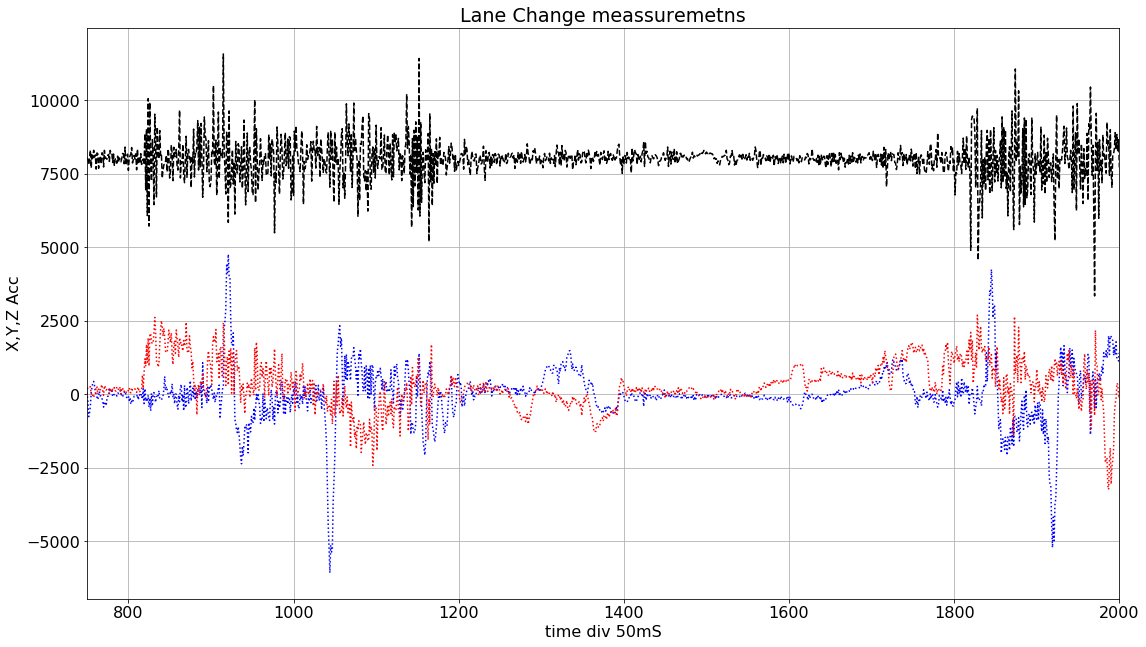

In [17]:
# Accelerometer Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Xaxes),
         np.squeeze(chlaneSpkrtArr[:,0]),
         'b:',
         np.squeeze(Xaxes),
         np.squeeze(chlaneSpkrtArr[:,1]),
         'r:',
         np.squeeze(Xaxes),
         np.squeeze(chlaneSpkrtArr[:,2]),
         'k--',)


plt.ylabel('X,Y,Z Acc')
plt.xlabel('time div 50mS')
plt.title("Lane Change meassuremetns")
plt.grid()
plt.xlim(750, 2000)
# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()

# T = 100 mS

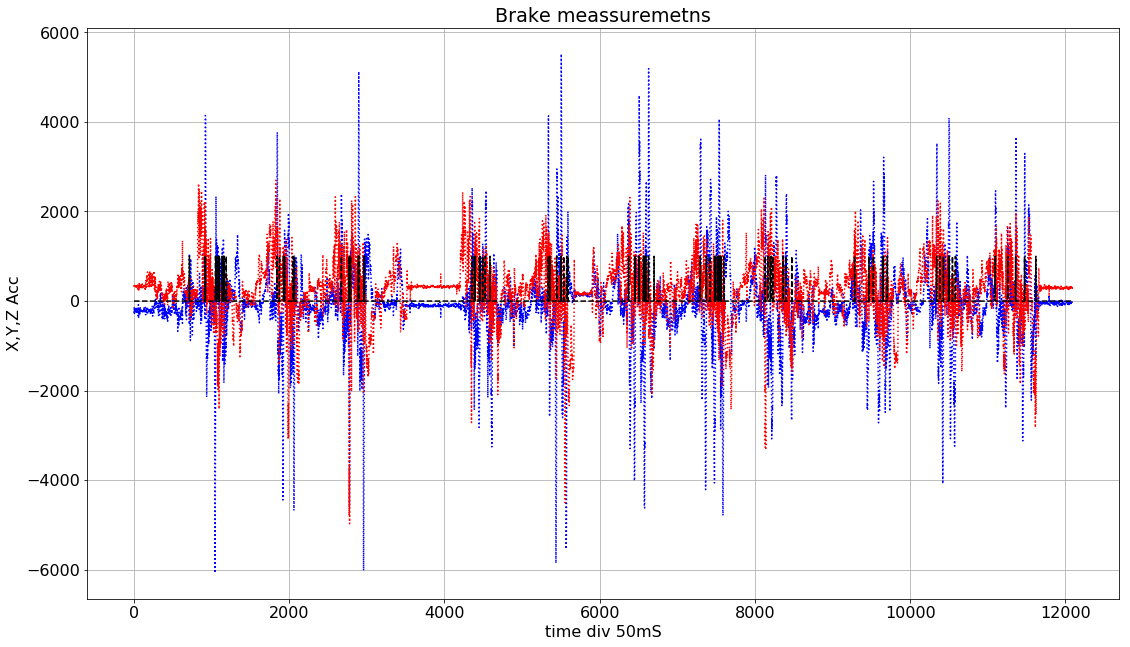

In [12]:
# Half sampling period from 50 to 100mS
XaxesHalf_indeces = np.arange(0,chlaneSpkrtArr.shape[0],2)
chlaneSpkrtArrHalf_indeces = chlaneSpkrtArr[::2]

stdMatrixShift_Half_indeces = np.roll(chlaneSpkrtArrHalf_indeces, 1, axis=0)
stdMatrixDiif_Half_indeces = (chlaneSpkrtArrHalf_indeces - stdMatrixShift_Half_indeces)/0.1
stdEventDetection_Half_indeces = stdMatrixDiif_Half_indeces >= 10000
stdEventDetection_Half_indeces = stdEventDetection_Half_indeces.astype(int)*1000
# Accelerometer Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(XaxesHalf_indeces),
         np.squeeze(chlaneSpkrtArrHalf_indeces[:,0]),
         'b:',
         np.squeeze(XaxesHalf_indeces),
         np.squeeze(chlaneSpkrtArrHalf_indeces[:,1]),
         'r:',
         np.squeeze(XaxesHalf_indeces),
         np.squeeze(stdEventDetection_Half_indeces[:,0]),
         'k--',)


plt.ylabel('X,Y,Z Acc')
plt.xlabel('time div 50mS')
plt.title("Brake meassuremetns")
plt.grid()
# plt.xlim(4000, 5500)
# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()

# T = 100mS 7s Windowing

In [20]:
print(XaxesHalf_indeces.shape)
print(chlaneSpkrtArrHalf_indeces.shape)
XFRAME_ELEMENTS = 70
XMAX_FRAME_COUNTER = chlaneSpkrtArrHalf_indeces.shape[0] - XFRAME_ELEMENTS
def get_FrameStatistics(wholeMatrix, frameIndex):
    FRAME_ELEMENTS = 70
    MAX_FRAME_COUNTER = wholeMatrix.shape[0] - FRAME_ELEMENTS
    if frameIndex < MAX_FRAME_COUNTER:
        frameMatrix = wholeMatrix[frameIndex:(frameIndex + FRAME_ELEMENTS)]
        meanArray = np.mean(frameMatrix, axis=0)
        medianArray = np.median(frameMatrix, axis=0)
        stdArray = np.std(frameMatrix, axis=0)
        
    else:
        print("ERR")
    
    return meanArray,medianArray,stdArray


# Frame elements offset matrixess
meanMatrix = np.zeros((XFRAME_ELEMENTS,10))
medianMatrix = np.zeros((XFRAME_ELEMENTS,10))
stdMatrix = np.zeros((XFRAME_ELEMENTS,10))
stdMatrixShift = np.zeros((XFRAME_ELEMENTS,10))
for i in range (XMAX_FRAME_COUNTER):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()

    meanArray,medianArray,stdArray = get_FrameStatistics(chlaneSpkrtArrHalf_indeces, i)
    
    meanMatrix = np.append(meanMatrix,meanArray.reshape((1, 10)),axis = 0)
    medianMatrix = np.append(medianMatrix,medianArray.reshape((1, 10)), axis = 0)
    stdMatrix = np.append(stdMatrix,stdArray.reshape((1, 10)), axis = 0)
    
stdMatrixShift = np.roll(stdMatrix, 1, axis=0)
stdMatrixDiif = (stdMatrix - stdMatrixShift)/0.1
stdEventDetection = stdMatrixDiif >= 500
stdEventDetectionInt = stdEventDetection.astype(int)*1000
print(meanMatrix.shape)
print(medianMatrix.shape)
print(stdMatrix.shape)


(6046,)
(6046, 10)
 Iteration 5975(6046, 10)
(6046, 10)
(6046, 10)


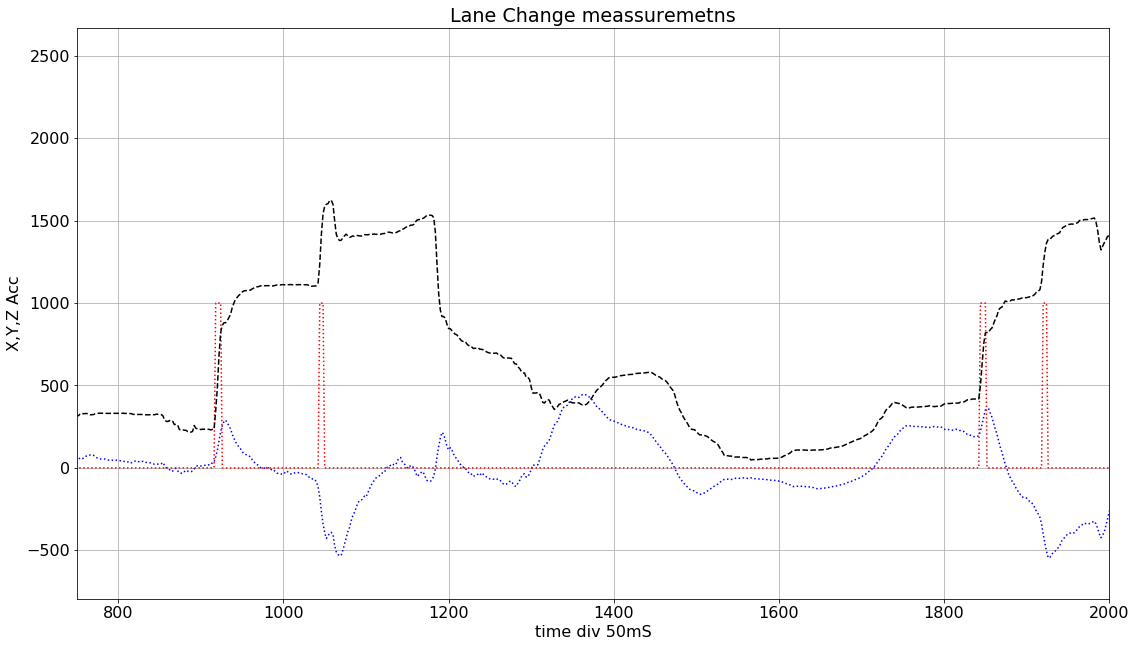

In [21]:
# Accelerometer Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(XaxesHalf_indeces),
         np.squeeze(meanMatrix[:,0]),
         'b:',
         np.squeeze(XaxesHalf_indeces),
         np.squeeze(stdEventDetectionInt[:,0]),
         'r:',
         np.squeeze(XaxesHalf_indeces),
         np.squeeze(stdMatrix[:,0]),
         'k--',)


plt.ylabel('X,Y,Z Acc')
plt.xlabel('time div 50mS')
plt.title("Lane Change meassuremetns")
plt.grid()
plt.xlim(750, 2000)
# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()

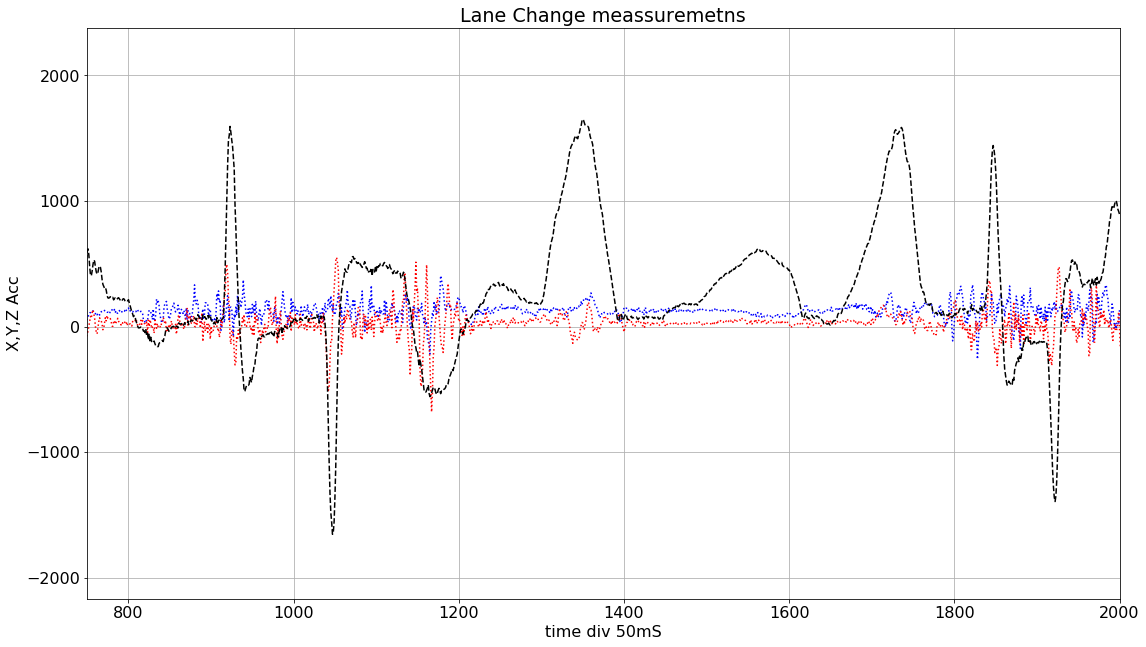

In [19]:
# Giroscope Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Xaxes),
         np.squeeze(chlaneSpkrtArr[:,3]),
         'b:',
         np.squeeze(Xaxes),
         np.squeeze(chlaneSpkrtArr[:,4]),
         'r:',
         np.squeeze(Xaxes),
         np.squeeze(chlaneSpkrtArr[:,5]),
         'k--',)


plt.ylabel('X,Y,Z Acc')
plt.xlabel('time div 50mS')
plt.title("Lane Change meassuremetns")
plt.grid()
plt.xlim(750, 2000)
# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()